<a href="https://colab.research.google.com/github/willismax/MediaSystem-Python-Course/blob/main/01.Intro-Python/Python%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90%E5%85%A5%E9%96%80_%E6%89%93%E5%BA%95%E7%AF%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python資料分析入門-打底篇

這一節我們談到常用的Jupyter Notebook使用方法，以及Python資料處理的神兵利器:Pandas

## 1. Jupyter Notebook使用打底

Jupyter Notebook是目前資料分析的主流平台，主要可使用Python，其他如R語言也有支援，有些指令要先瞭解會更好用。
- 首先知道執行除了按"RUN"，更常用的是"shift+enter"
- 魔術指令
    - %CD 如系統的cd切換路徑
    - %timeit 將試跑N次該格程式碼，計算平均執行時間
    - %matplotlib inline 圖會直接顯示在網頁裡面(預設matplotlib圖會另開視窗)
- 系統指令
    - !pwd 系統路徑
    - !pip3 install 套件名稱 #如同在終端機視窗下達指令，只要你加了驚嘆號

In [ ]:
!pwd

/content


### 1. Jupyter Notebook畫圖兩三事


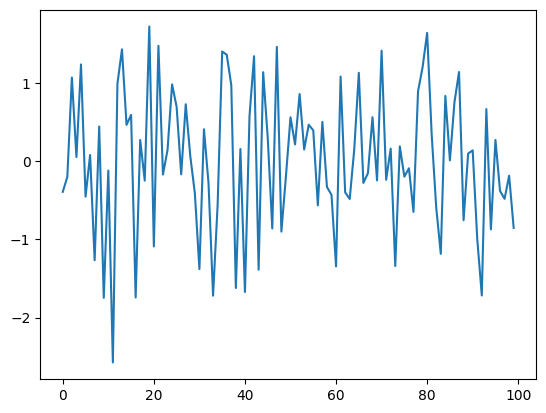

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(np.random.randn(100))

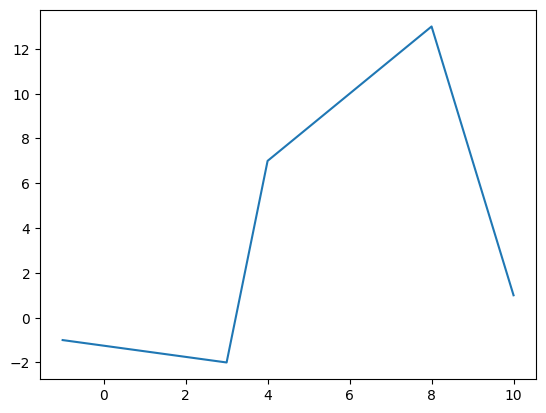

In [ ]:
x1 = [-1, 3, 4, 8 , 10]
x2 = [-1, -2, 7, 13 , 1]
plt.plot(x1, x2)
plt.show()

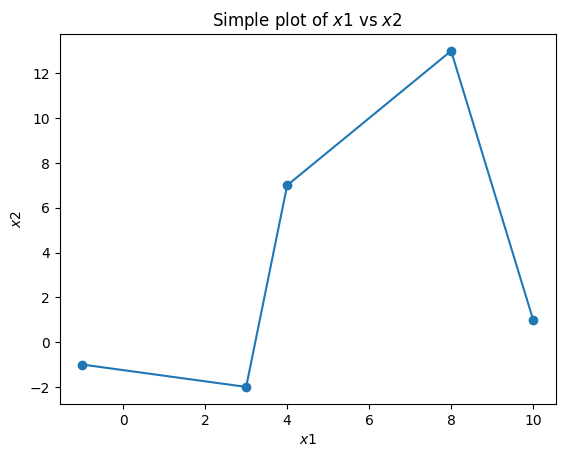

In [ ]:
# Plot data with a line and dots at the data points (this is what '-o' does)
plt.plot(x1, x2, '-o')

# Attach labels and title (using LaTeX syntax)
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.title("Simple plot of $x1$ vs $x2$")
plt.show()

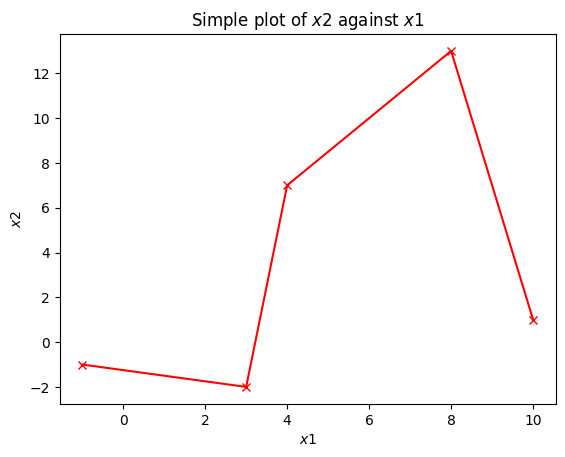

In [ ]:
# Plot data with a red solid line and crosses at the data points (this is what '-xr' does)
plt.plot(x1, x2, '-xr')

# Attach labels and title
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.title("Simple plot of $x2$ against $x1$")

# Save plot to file
plt.savefig(".\data\my-plot.pdf")
plt.show()

### 2. Bar charts

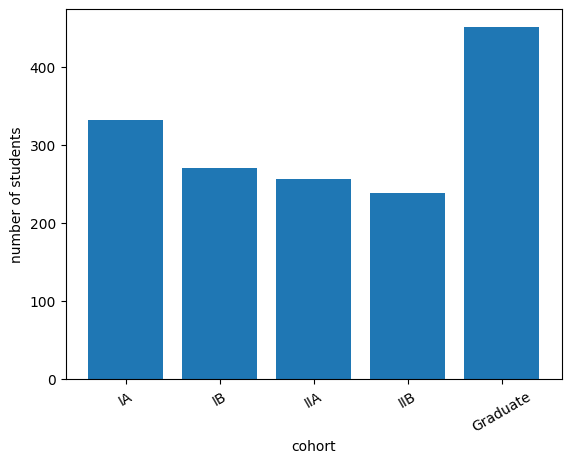

In [ ]:
cohort = ('IA', 'IB', 'IIA', 'IIB', 'Graduate')
num_students = (332, 270, 256, 238, 451)

# Create an array with the position of each bar along the x-axis, e.g [0, 1, 2, 3, 4]
x_pos = np.arange(len(cohort))

# Produce bar plot
plt.bar(x_pos, num_students, align='center');

# Replace the x ticks with the Tripos name, and rotate labels 30 degrees
plt.xticks(x_pos, cohort, rotation=30)

# Add axis labels
plt.xlabel('cohort')
plt.ylabel('number of students')

plt.show()


### 3.Histograms

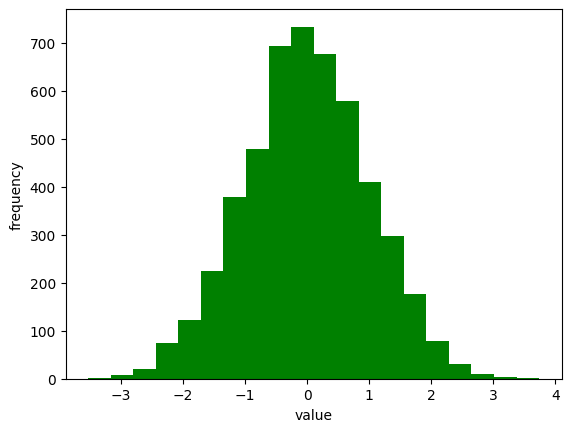

In [ ]:
# loc=mean, scale=stddev, size=num samples
x = np.random.normal(loc=0.0, scale=1.0, size=5000)

# Produce histogram with 20 bins (try changing the number of bins)
n, bins, patches = plt.hist(x, 20, facecolor='green');

# Add label
plt.xlabel('value')
plt.ylabel('frequency')

plt.show()

### 4. Pie charts

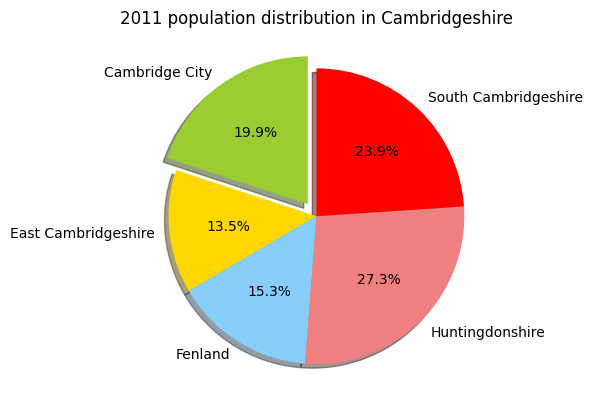

In [ ]:
district = ('Cambridge City', 'East Cambridgeshire', 'Fenland', 'Huntingdonshire',
            'South Cambridgeshire')
population = (123900, 83800, 95300, 169500, 148800)

# Specify slice colours
# (see http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']

# "explode" the 1st slice (Cambridge City)
explode = (0.1, 0.0, 0, 0, 0)

# Produce pie chart. The slices will be ordered and plotted counter-clockwise.
plt.pie(population, explode=explode, labels=district, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

# Add title
plt.title("2011 population distribution in Cambridgeshire")

plt.show()

##### 補充：　圖表顯示中文
- 這方面太多坑，請參閱http://white5168.blogspot.com/2017/12/jupyter-notebook-9-matplotlib.html#.XLa91OgzaUk

#  2. 使用Python的Pandas

Python的套件Pandas，是使用Python進行資料科學非常重要的套件，熟悉後如同使用EXCEL方便，可進行輸入、整理、分析、輸出資料等主要任務。

利用Pandas，我們可以分析time series，Pandas有兩種主要的資料結構：
* Series：一條時間序列
* DataFrame：很多的時間序列

我們直接嘗試使用DataFrame格式吧

In [1]:
import pandas as pd

餐名 = ["一號餐", "二號餐", "三號餐", "四號餐", "五號餐"]
價錢 = [60, 70, 80, 90, 100]

豆豆屋訂餐_dict = {"餐名":餐名,"價錢":價錢}

豆豆屋訂餐_df = pd.DataFrame(豆豆屋訂餐_dict)

豆豆屋訂餐_df

,餐名,價錢
0,一號餐,60
1,二號餐,70
2,三號餐,80
3,四號餐,90
4,五號餐,100


In [2]:
# 使用屬性

print(豆豆屋訂餐_df.ndim)
print("--我是分格線--"*5)
print(豆豆屋訂餐_df.shape)
print("--我是分格線--"*5)
print(豆豆屋訂餐_df.dtypes)


2
--我是分格線----我是分格線----我是分格線----我是分格線----我是分格線--
(5, 2)
--我是分格線----我是分格線----我是分格線----我是分格線----我是分格線--
餐名    object
價錢     int64
dtype: object


In [3]:
# 刪除觀測值
豆豆屋訂餐_df_no_mw = 豆豆屋訂餐_df.drop(0, axis = 0)
print(豆豆屋訂餐_df_no_mw)
print("---") # 分隔線

# 刪除欄位
豆豆屋訂餐_no_groups = 豆豆屋訂餐_df.drop("價錢", axis = 1)
print(豆豆屋訂餐_no_groups)

    餐名   價錢
1  二號餐   70
2  三號餐   80
3  四號餐   90
4  五號餐  100
---
    餐名
0  一號餐
1  二號餐
2  三號餐
3  四號餐
4  五號餐


透過 loc, iloc 屬性篩選 Dataframe
- 我們可以透過 loc 屬性（利用欄位名稱）篩選 Dataframe。
- 我們可以透過 iloc 屬性（利用索引值）篩選 Dataframe。

In [8]:
# df.loc 選擇欄位
豆豆屋訂餐_df.loc[:, "餐名"]

0    一號餐
1    二號餐
2    三號餐
3    四號餐
4    五號餐
Name: 餐名, dtype: object

In [9]:
# 同時選擇欄位與觀測值
豆豆屋訂餐_df.loc[0, "餐名"]

'一號餐'

In [10]:
# df.iloc 以索引選擇觀測值
豆豆屋訂餐_df.iloc[0]

餐名    一號餐
價錢     60
Name: 0, dtype: object

In [11]:
#透過布林值篩選 data frame
filter = 豆豆屋訂餐_df["價錢"] > 60
豆豆屋訂餐_df[filter] # 篩選 data frame

,餐名,價錢
1,二號餐,70
2,三號餐,80
3,四號餐,90
4,五號餐,100


排序
- sort_index() 方法
- sort_values() 方法
- 使用 data frame 的 sort_index() 方法可以用索引值排序。

In [12]:
# 用索引值排序
豆豆屋訂餐_df.sort_index()

,餐名,價錢
0,一號餐,60
1,二號餐,70
2,三號餐,80
3,四號餐,90
4,五號餐,100


In [13]:
# 用數值排序
豆豆屋訂餐_df.sort_values(by = "餐名")

,餐名,價錢
0,一號餐,60
2,三號餐,80
1,二號餐,70
4,五號餐,100
3,四號餐,90


### 描述統計
data frame 有 sum()、mean()、median() 與 describe() 等統計方法可以使用。

In [16]:
print(豆豆屋訂餐_df.sum()) # 計算總鐵人數
print("---") # 分隔線
print(豆豆屋訂餐_df["價錢"].mean()) # 計算平均鐵人數
print("---") # 分隔線
print(豆豆屋訂餐_df["價錢"].median()) # 計算中位數
print("---") # 分隔線
print(豆豆屋訂餐_df.describe()) # 描述統計

餐名    一號餐二號餐三號餐四號餐五號餐
價錢                400
dtype: object
---
80.0
---
80.0
---
               價錢
count    5.000000
mean    80.000000
std     15.811388
min     60.000000
25%     70.000000
50%     80.000000
75%     90.000000
max    100.000000


### 相異值個數
透過 pandas 的 value_counts() 方法可以統計相異值的個數。

In [17]:
pd.value_counts(豆豆屋訂餐_df.價錢)
#pd.value_counts(豆豆屋訂餐_df.餐名)

價錢
60     1
70     1
80     1
90     1
100    1
Name: count, dtype: int64

### 遺失值
判斷遺失值
- isnull() 方法
- notnull() 方法

In [20]:
import numpy as np
import pandas as pd

# 假設 locations 表示不同測量點的位置，PM2.5 表示在該位置測量到的 PM2.5 數值
locations = ["台北", "台中", np.nan, "高雄", "台南", "新竹"]
pm25_values = [18, 35, 56, np.nan, 22, 30]

data_dict = {
    "locations": locations,
    "PM2.5": pm25_values
}

# 建立 DataFrame
pm25_df = pd.DataFrame(data_dict)

In [21]:
pm25_df

,locations,PM2.5
0,台北,18.0
1,台中,35.0
2,NaN,56.0
3,高雄,NaN
4,台南,22.0
5,新竹,30.0


In [22]:
# 判斷哪些位置的名稱是遺失值
pm25_df.loc[:, "locations"].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
Name: locations, dtype: bool

In [23]:
# 判斷哪些位置的 PM2.5 數值不是遺失值
pm25_df.loc[:, "PM2.5"].notnull()

0     True
1     True
2     True
3    False
4     True
5     True
Name: PM2.5, dtype: bool

### 處理遺失值
- dropna() 方法
- fillna() 方法

In [25]:
# 有遺失值的觀測值都刪除
pm25_df_na_dropped = pm25_df.dropna()
pm25_df_na_dropped

,locations,PM2.5
0,台北,18.0
1,台中,35.0
4,台南,22.0
5,新竹,30.0


In [26]:
# 有遺失值的觀測值都刪除
pm25_df_na_filled = pm25_df.fillna(0)
pm25_df_na_filled

,locations,PM2.5
0,台北,18.0
1,台中,35.0
2,0,56.0
3,高雄,0.0
4,台南,22.0
5,新竹,30.0


In [27]:
# 依欄位填補遺失值
# 對於 locations 欄位，遺失值被填補為 "未知位置"。
# 對於 PM2.5 欄位，遺失值被填補為 50。

pm25_df_na_filled = pm25_df.fillna({"locations": "未知位置", "PM2.5": 50})
pm25_df_na_filled

,locations,PM2.5
0,台北,18.0
1,台中,35.0
2,未知位置,56.0
3,高雄,50.0
4,台南,22.0
5,新竹,30.0


### reference
- [蔡炎龍老師Github](https://github.com/yenlung/Python-3-Data-Analysis-Basics)
- https://ithelp.ithome.com.tw/articles/10185922